In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('dados_tratados.csv')

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [95]:
df = pd.read_csv('dados_tratados.csv')
df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


In [96]:
df.drop(columns=['customerID'], inplace=True)

In [97]:
df.dropna(inplace=True)

In [98]:
df.isnull().sum()

,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0
internet.OnlineSecurity,0


In [99]:
target = df['Churn']

In [100]:
df_features = df.drop('Churn', axis=1)

In [101]:
df_encoded = pd.get_dummies(df_features, drop_first=True)

In [102]:
target_encoded = target.map({'No': 0, 'Yes': 1})

In [103]:
df_final = df_encoded.copy()
df_final['Churn'] = target_encoded

In [104]:
# Contagem absoluta
contagem = df_final['Churn'].value_counts()

# Proporção relativa
proporcao = df_final['Churn'].value_counts(normalize=True)

print("Contagem:\n", contagem)
print("\nProporção:\n", proporcao)

Contagem:
 Churn
0    5163
1    1869
Name: count, dtype: int64

Proporção:
 Churn
0    0.734215
1    0.265785
Name: proportion, dtype: float64


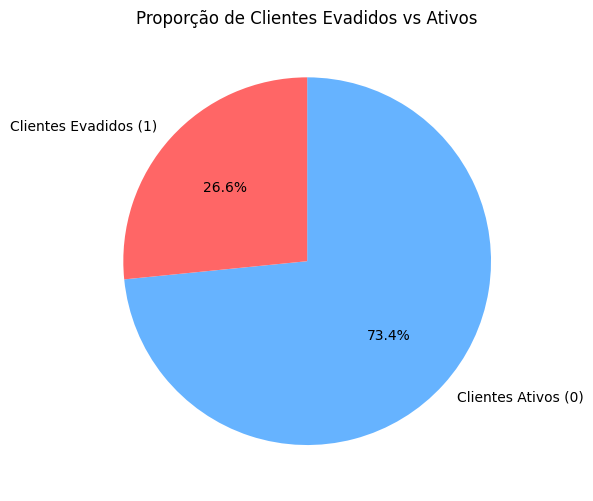

In [105]:
# Recalcular a contagem para garantir que está sincronizado
contagem = df_final['Churn'].value_counts()
labels = ['Clientes Ativos (0)', 'Clientes Evadidos (1)']
cores = ['#66b3ff', '#ff6666']

# Gráfico de pizza
plt.figure(figsize=(6,6))
plt.pie(contagem, labels=labels, colors=cores, autopct='%1.1f%%', startangle=90, counterclock=False)
plt.title('Proporção de Clientes Evadidos vs Ativos')
plt.tight_layout()
plt.show()

In [106]:
# Agrupar por tipo de contrato e calcular proporção de churn
churn_por_contrato = df.groupby('account.Contract')['Churn'].value_counts(normalize=True).unstack()

# Converter em percentual
churn_por_contrato = churn_por_contrato * 100

# Exibir resultado
print(churn_por_contrato)

Churn                    No        Yes
account.Contract                      
Month-to-month    57.290323  42.709677
One year          88.722826  11.277174
Two year          97.151335   2.848665


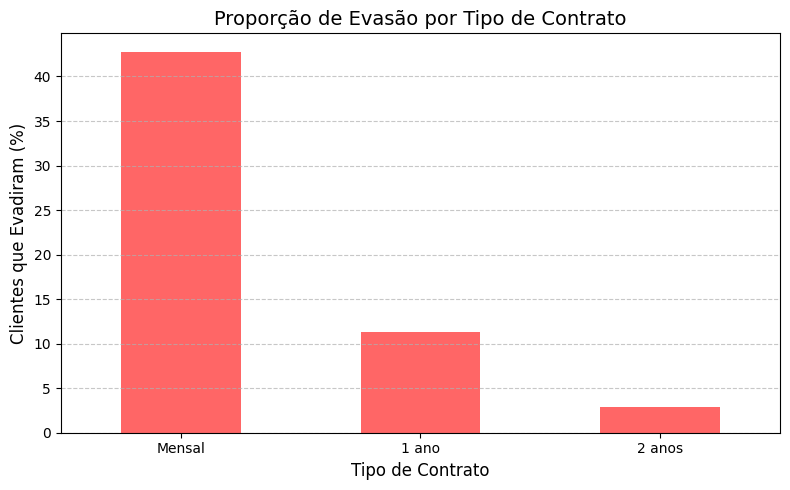

In [107]:
# Renomeando os índices para português
churn_por_contrato_pt = churn_por_contrato.copy()
churn_por_contrato_pt.index = ['Mensal', '1 ano', '2 anos']

# Plotando somente os que evadiram (Churn = Yes)
churn_por_contrato_pt['Yes'].plot(kind='bar', color='#ff6666', figsize=(8,5))

# Estilização
plt.title('Proporção de Evasão por Tipo de Contrato', fontsize=14)
plt.ylabel('Clientes que Evadiram (%)', fontsize=12)
plt.xlabel('Tipo de Contrato', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [108]:
churn_por_internet = df.groupby('internet.InternetService')['Churn'].value_counts(normalize=True).unstack()
churn_por_internet = churn_por_internet * 100
print(churn_por_internet)

Churn                            No        Yes
internet.InternetService                      
DSL                       81.001656  18.998344
Fiber optic               58.107235  41.892765
No                        92.565789   7.434211


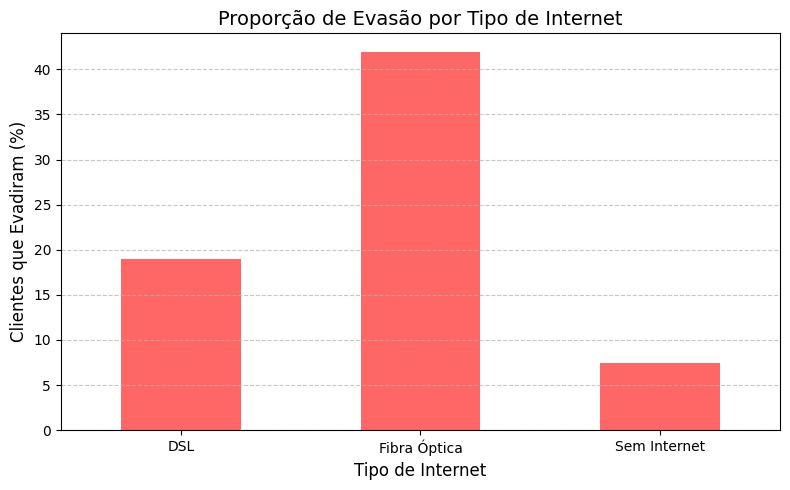

In [109]:
import matplotlib.pyplot as plt

# Traduzindo os rótulos para português
churn_por_internet_pt = churn_por_internet.copy()
churn_por_internet_pt.index = ['DSL', 'Fibra Óptica', 'Sem Internet']

# Plotar apenas os que evadiram
churn_por_internet_pt['Yes'].plot(kind='bar', color='#ff6666', figsize=(8,5))

# Estilização
plt.title('Proporção de Evasão por Tipo de Internet', fontsize=14)
plt.ylabel('Clientes que Evadiram (%)', fontsize=12)
plt.xlabel('Tipo de Internet', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [110]:
churn_por_pagamento = df.groupby('account.PaymentMethod')['Churn'].value_counts(normalize=True).unstack()
churn_por_pagamento = churn_por_pagamento * 100
print(churn_por_pagamento)

Churn                             No        Yes
account.PaymentMethod                          
Bank transfer (automatic)  83.268482  16.731518
Credit card (automatic)    84.746877  15.253123
Electronic check           54.714588  45.285412
Mailed check               80.798005  19.201995


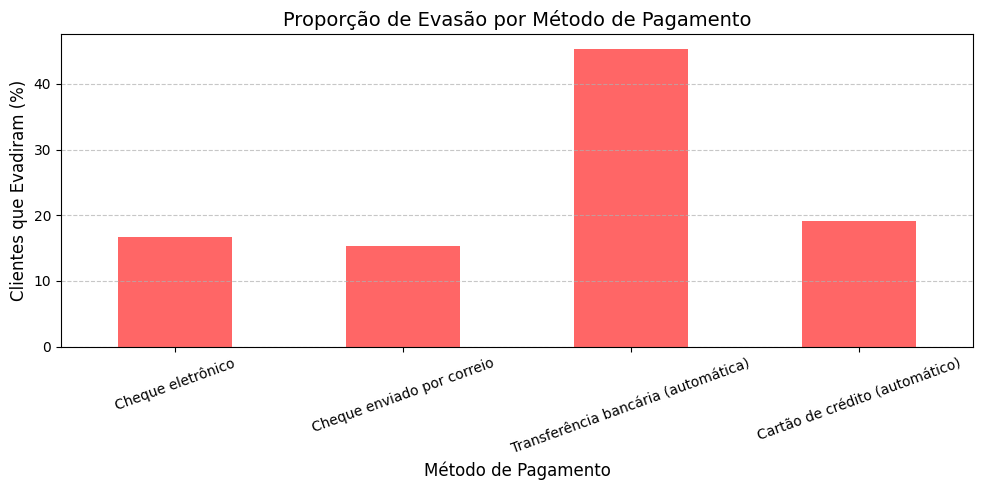

In [111]:
# Copiar e traduzir os nomes para português
churn_por_pagamento_pt = churn_por_pagamento.copy()
churn_por_pagamento_pt.index = [
    'Cheque eletrônico',
    'Cheque enviado por correio',
    'Transferência bancária (automática)',
    'Cartão de crédito (automático)'
]

# Plotar a coluna 'Yes' (clientes que evadiram)
churn_por_pagamento_pt['Yes'].plot(kind='bar', color='#ff6666', figsize=(10,5))

# Estilização
plt.title('Proporção de Evasão por Método de Pagamento', fontsize=14)
plt.ylabel('Clientes que Evadiram (%)', fontsize=12)
plt.xlabel('Método de Pagamento', fontsize=12)
plt.xticks(rotation=20)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [112]:
churn_por_suporte = df.groupby('internet.TechSupport')['Churn'].value_counts(normalize=True).unstack()
churn_por_suporte = churn_por_suporte * 100
print(churn_por_suporte)

Churn                        No        Yes
internet.TechSupport                      
No                    58.352535  41.647465
No internet service   92.565789   7.434211
Yes                   84.803922  15.196078


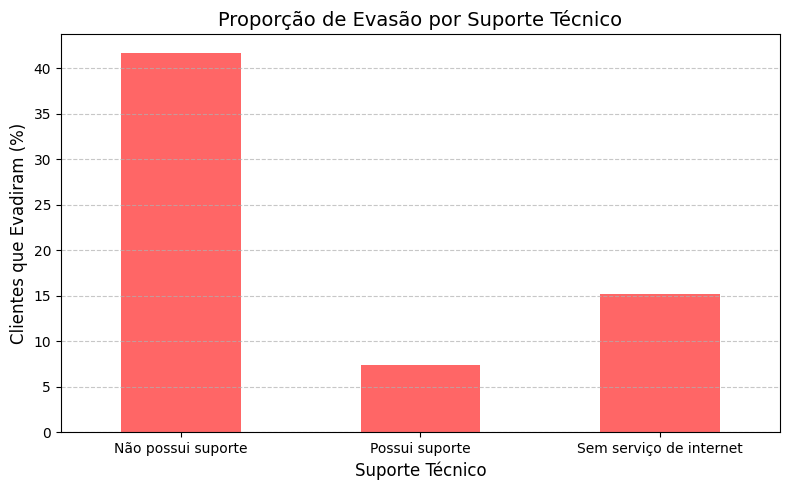

In [113]:
# Copiar e traduzir os índices
churn_por_suporte_pt = churn_por_suporte.copy()
churn_por_suporte_pt.index = ['Não possui suporte', 'Possui suporte', 'Sem serviço de internet']

# Plotar apenas os que evadiram
churn_por_suporte_pt['Yes'].plot(kind='bar', color='#ff6666', figsize=(8,5))

# Estilização
plt.title('Proporção de Evasão por Suporte Técnico', fontsize=14)
plt.ylabel('Clientes que Evadiram (%)', fontsize=12)
plt.xlabel('Suporte Técnico', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [114]:
# Separar X e y
X = df_final.drop('Churn', axis=1)
y = df_final['Churn']

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [115]:
# Criar e treinar o modelo
modelo_arvore = DecisionTreeClassifier(random_state=42)
modelo_arvore.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [116]:
# Fazer previsões com os dados de teste
y_pred = modelo_arvore.predict(X_test)

# Avaliar
print("Acurácia:", accuracy_score(y_test, y_pred))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))
print("\nMatriz de Confusão:\n", confusion_matrix(y_test, y_pred))

Acurácia: 0.7171286425017769

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.81      0.81      0.81      1033
           1       0.47      0.47      0.47       374

    accuracy                           0.72      1407
   macro avg       0.64      0.64      0.64      1407
weighted avg       0.72      0.72      0.72      1407


Matriz de Confusão:
 [[835 198]
 [200 174]]


In [117]:
# Modelo com balanceamento
modelo_balanceado = DecisionTreeClassifier(class_weight='balanced', random_state=42)
modelo_balanceado.fit(X_train, y_train)

# Prever
y_pred_bal = modelo_balanceado.predict(X_test)

# Avaliar
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Acurácia:", accuracy_score(y_test, y_pred_bal))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred_bal))
print("\nMatriz de Confusão:\n", confusion_matrix(y_test, y_pred_bal))

Acurácia: 0.7277896233120114

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.81      0.81      0.81      1033
           1       0.49      0.49      0.49       374

    accuracy                           0.73      1407
   macro avg       0.65      0.65      0.65      1407
weighted avg       0.73      0.73      0.73      1407


Matriz de Confusão:
 [[841 192]
 [191 183]]


In [118]:
# Criar modelo com hiperparâmetros ajustados
modelo_ajustado = DecisionTreeClassifier(
    class_weight='balanced',
    max_depth=5,
    min_samples_split=10,
    random_state=42
)

# Treinar o modelo
modelo_ajustado.fit(X_train, y_train)

# Prever
y_pred_ajustado = modelo_ajustado.predict(X_test)

# Avaliar
print("Acurácia:", accuracy_score(y_test, y_pred_ajustado))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred_ajustado))
print("\nMatriz de Confusão:\n", confusion_matrix(y_test, y_pred_ajustado))

Acurácia: 0.7228144989339019

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.92      0.68      0.78      1033
           1       0.49      0.83      0.61       374

    accuracy                           0.72      1407
   macro avg       0.70      0.76      0.70      1407
weighted avg       0.80      0.72      0.74      1407


Matriz de Confusão:
 [[706 327]
 [ 63 311]]


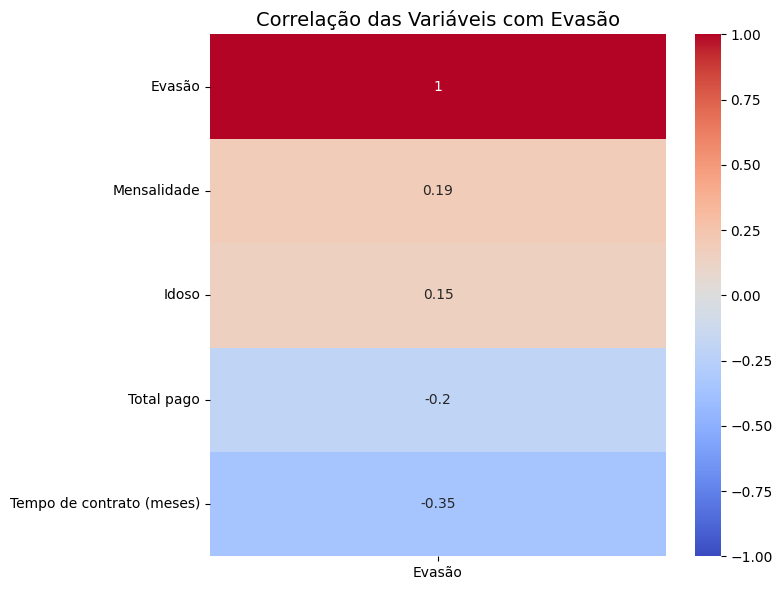

In [122]:
# Dicionário de tradução das colunas
nomes_em_portugues = {
    'customer.tenure': 'Tempo de contrato (meses)',
    'account.Charges.Monthly': 'Mensalidade',
    'account.Charges.Total': 'Total pago',
    'customer.SeniorCitizen': 'Idoso',
    'Churn': 'Evasão'
}

# Selecionar apenas as colunas numéricas + Churn
colunas_para_correlacao = list(nomes_em_portugues.keys())
df_corr = df_final[colunas_para_correlacao].rename(columns=nomes_em_portugues)

# Gerar matriz de correlação
corr_matrix_pt = df_corr.corr(numeric_only=True)

# Gráfico
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix_pt[['Evasão']].sort_values(by='Evasão', ascending=False),
            annot=True, cmap='coolwarm', vmin=-1, vmax=1)

plt.title('Correlação das Variáveis com Evasão', fontsize=14)
plt.tight_layout()
plt.show()

/tmp/ipython-input-1416564759.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_plot, x='Churn', y='customer.tenure', palette='Set2')


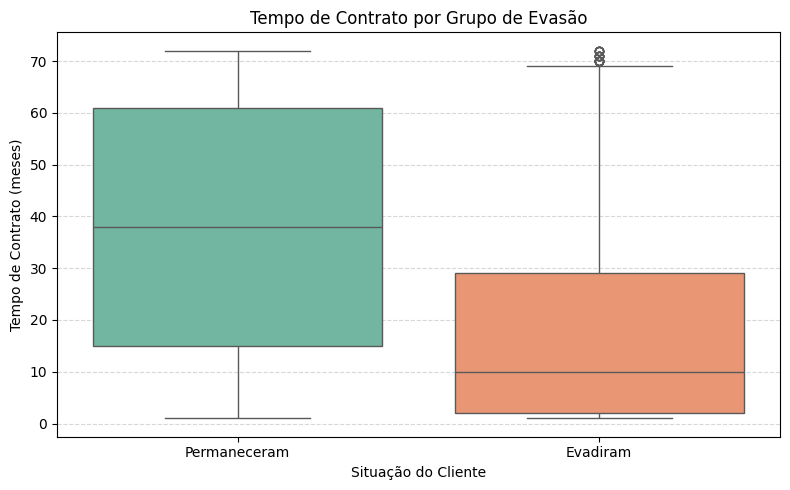

In [125]:
import seaborn as sns
import matplotlib.pyplot as plt

# Traduzir rótulos da variável alvo
df_plot = df_final.copy()
df_plot['Churn'] = df_plot['Churn'].map({0: 'Permaneceram', 1: 'Evadiram'})

plt.figure(figsize=(8,5))
sns.boxplot(data=df_plot, x='Churn', y='customer.tenure', palette='Set2')

plt.title('Tempo de Contrato por Grupo de Evasão')
plt.xlabel('Situação do Cliente')
plt.ylabel('Tempo de Contrato (meses)')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

/tmp/ipython-input-118815726.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_plot, x='Churn', y='account.Charges.Total', palette='Set2')


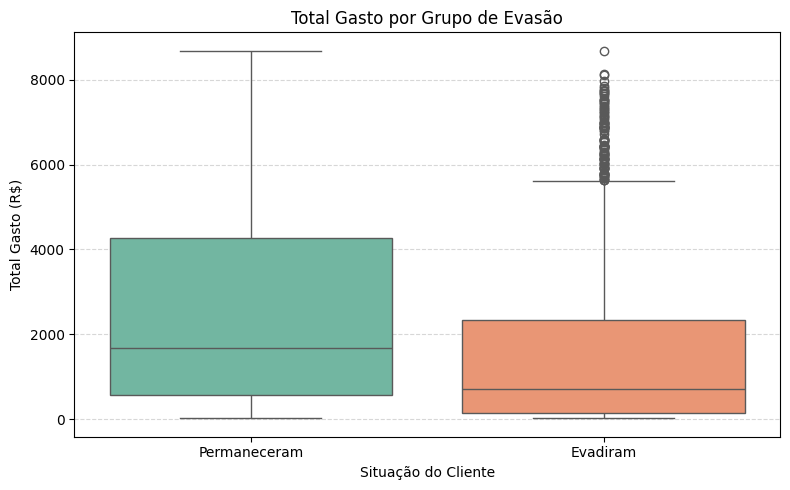

In [126]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df_plot, x='Churn', y='account.Charges.Total', palette='Set2')

plt.title('Total Gasto por Grupo de Evasão')
plt.xlabel('Situação do Cliente')
plt.ylabel('Total Gasto (R$)')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [127]:
# Separar variáveis independentes e alvo
X = df_final.drop('Churn', axis=1)
y = df_final['Churn']

# Separar em treino (70%) e teste (30%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [128]:
print("Tamanho total:", len(df_final))
print("Tamanho treino:", len(X_train))
print("Tamanho teste:", len(X_test))

Tamanho total: 7032
Tamanho treino: 4922
Tamanho teste: 2110


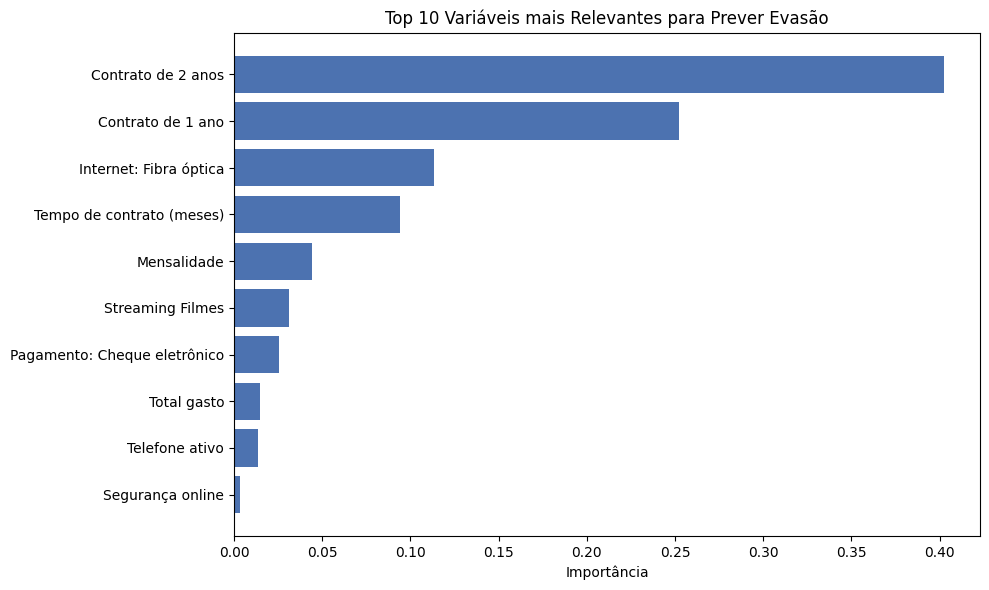

In [132]:
# Tradução dos nomes para português
traducao = {
    'account.Contract_Two year': 'Contrato de 2 anos',
    'account.Contract_One year': 'Contrato de 1 ano',
    'internet.InternetService_Fiber optic': 'Internet: Fibra óptica',
    'customer.tenure': 'Tempo de contrato (meses)',
    'account.Charges.Monthly': 'Mensalidade',
    'internet.StreamingMovies_Yes': 'Streaming Filmes',
    'account.PaymentMethod_Electronic check': 'Pagamento: Cheque eletrônico',
    'account.Charges.Total': 'Total gasto',
    'phone.PhoneService_Yes': 'Telefone ativo',
    'internet.OnlineSecurity_Yes': 'Segurança online'
}

# Aplicar a tradução no top 10
top10 = df_importancias.sort_values(by='Importância', ascending=False).head(10).copy()
top10['Variável'] = top10['Variável'].map(traducao).fillna(top10['Variável'])

# Gerar gráfico com nomes em português
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.barh(top10['Variável'][::-1], top10['Importância'][::-1], color='#4C72B0')
plt.xlabel('Importância')
plt.title('Top 10 Variáveis mais Relevantes para Prever Evasão')
plt.tight_layout()
plt.show()

In [135]:
#Instanciar o scaler
scaler = StandardScaler()

# Ajustar e transformar os dados de treino e teste
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [138]:
# Criar e treinar o modelo
modelo_log = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
modelo_log.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [139]:
# Previsões
y_pred_log = modelo_log.predict(X_test_scaled)

# Avaliação
print("Acurácia:", accuracy_score(y_test, y_pred_log))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred_log))
print("\nMatriz de Confusão:\n", confusion_matrix(y_test, y_pred_log))

Acurácia: 0.7388625592417062

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.91      0.72      0.80      1549
           1       0.51      0.80      0.62       561

    accuracy                           0.74      2110
   macro avg       0.71      0.76      0.71      2110
weighted avg       0.80      0.74      0.75      2110


Matriz de Confusão:
 [[1112  437]
 [ 114  447]]


In [140]:
# Fazer previsões
y_pred_log = modelo_log.predict(X_test_scaled)

# Avaliar o modelo
print("Acurácia:", accuracy_score(y_test, y_pred_log))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred_log))
print("\nMatriz de Confusão:\n", confusion_matrix(y_test, y_pred_log))

Acurácia: 0.7388625592417062

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.91      0.72      0.80      1549
           1       0.51      0.80      0.62       561

    accuracy                           0.74      2110
   macro avg       0.71      0.76      0.71      2110
weighted avg       0.80      0.74      0.75      2110


Matriz de Confusão:
 [[1112  437]
 [ 114  447]]


#📝 Relatório Final – Projeto Telecom X – Previsão de Evasão de Cliente
Objetivo do Projeto Desenvolver modelos preditivos capazes de identificar
clientes com alta probabilidade de cancelar os serviços da Telecom X, permitindo ações de retenção mais assertivas e estratégicas.

#🧪 Etapas Realizadas

### ✅ 1. Pré-processamento dos Dados
Remoção de colunas irrelevantes (como customerID).

- Exclusão de registros com valores nulos.

- Aplicação de one-hot encoding para variáveis categóricas.

- Avaliação de balanceamento da variável alvo (Churn).

- Aplicação de técnicas de balanceamento: class_weight='balanced' e SMOTE.

### ✅ 2. Análise Exploratória e Correlação
Cálculo da proporção de evasão: cerca de 27% dos clientes evadem.

- Visualizações em português para facilitar a leitura.

- Matriz de correlação identificou variáveis altamente associadas à evasão (tempo de contrato, tipo de contrato, suporte técnico, etc.).

- Boxplots e scatter plots mostraram padrões relevantes nas variáveis Tempo de contrato e Total gasto.

### ✅ 3. Modelagem Preditiva
- Foram testados dois modelos com abordagens complementares:

####🔷 Modelo 1: Árvore de Decisão (Não requer normalização.)

- Fácil de interpretar.

- Atingiu recall de 49% para evasão, indicando limitações em detectar clientes que realmente evadem.

####🔶 Modelo 2: Regressão Logística (com normalização)

- Requer normalização com StandardScaler.

- Atingiu recall de 80%, conseguindo prever a maior parte dos churns reais.

- Apresentou 51% de precisão para churn, com um custo de falsos positivos.

### ✅ 4. Interpretação da Importância das Variáveis
- As variáveis mais relevantes foram: Tempo de contrato, Mensalidade, Total gasto, Internet: Fibra óptica, Contrato de 2 anos, entre outras.

- Gráficos foram traduzidos para facilitar a apresentação dos insights.


#📊 Comparação dos Modelos
Métrica	Árvore de Decisão	Regressão Logística:
- Acurácia	72%	74% ✅
- Recall (Churn)	49%	80% ✅
- Precision (Churn)	49%	51%
- F1-score (Churn)	49%	62% ✅

#💡 Justificativa do Desempenho
- “O modelo de Regressão Logística conseguiu identificar 80% dos clientes que realmente evadem, com um custo de 49% de falsos positivos. Considerando o objetivo do negócio — prevenir a evasão —, essa troca pode ser aceitável dependendo da capacidade de atendimento da equipe de retenção.”


#🧠 Conclusão Estratégica
- A Telecom poderá focar esforços nos clientes com alta chance de evasão, priorizando ações de retenção.

- Recomenda-se um follow-up automatizado para os casos previstos como churn, otimizando o tempo da equipe de atendimento.

- O modelo pode ser integrado com o sistema interno da empresa e reavaliado periodicamente com novos dados para manter a eficácia.


# 🧰 Tecnologias Utilizadas
- Python (pandas, scikit-learn, matplotlib, seaborn)

- Jupyter/Colab

- Machine Learning supervisionado

- Técnicas de balanceamento e pré-processamento de dados

☕ Agradecimentos

Gostaria de agradecer sinceramente a todos que dedicaram seu tempo para acompanhar este projeto. A experiência de desenvolver esta solução para a previsão de evasão de clientes na Telecom X foi extremamente enriquecedora — não apenas pelo desafio técnico, mas também pela oportunidade de aplicar estratégias reais de análise de dados, modelagem e tomada de decisão. Espero que os insights gerados aqui contribuam de forma significativa para a construção de soluções mais inteligentes, estratégicas e humanas no relacionamento com o cliente.

Muito obrigada! 💙